<a href="https://colab.research.google.com/github/phraretein/flight_delay_prediction/blob/master/Flight_Delay_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pickle5

     |████████████████████████████████| 133kB 18.2MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219243 sha256=d57257f77101d5b26b89e93f7a00843d60ff20a49c06b13bfe14b5e2f0322733
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [4]:
import pickle5 as pickle

In [48]:
# Retrieve Data
df_test = pickle.load(open(r'/content/drive/My Drive/Senior Project/df_test.pkl', "rb"))
df_train = pickle.load(open(r'/content/drive/My Drive/Senior Project/df_train.pkl', "rb"))

In [6]:
df_test

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE
0,2018,6,1,WN,AUS,ATL,645,0.0,955,130.0,813.0
1,2018,6,1,WN,AUS,ATL,1750,0.0,2100,130.0,813.0
2,2018,6,1,WN,AUS,ATL,1205,0.0,1515,130.0,813.0
3,2018,6,23,WN,AUS,ATL,730,0.0,1045,135.0,813.0
4,2018,6,23,WN,AUS,ATL,1525,0.0,1845,140.0,813.0
...,...,...,...,...,...,...,...,...,...,...,...
3368774,2018,8,6,AS,TPA,SEA,1738,0.0,2035,357.0,2520.0
3368775,2018,8,7,AS,TPA,SEA,1738,1.0,2035,357.0,2520.0
3368776,2018,8,8,AS,TPA,SEA,1738,0.0,2035,357.0,2520.0
3368777,2018,8,9,AS,TPA,SEA,1738,0.0,2035,357.0,2520.0


In [7]:
df_train

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE
0,2016,6,16,AS,ATL,SEA,1850,0.0,2115,325.0,2182.0
1,2016,6,12,AS,ATL,SEA,1850,0.0,2115,325.0,2182.0
2,2016,6,4,DL,ATL,SEA,940,0.0,1157,317.0,2182.0
3,2016,6,5,DL,ATL,SEA,1745,0.0,2010,325.0,2182.0
4,2016,6,17,DL,ATL,SEA,1215,0.0,1437,322.0,2182.0
...,...,...,...,...,...,...,...,...,...,...,...
5923793,2016,6,20,WN,SMF,SAN,1255,1.0,1420,85.0,480.0
5923794,2016,6,26,WN,SMF,SAN,1405,1.0,1530,85.0,480.0
5923795,2016,6,27,WN,SMF,SAN,1610,1.0,1735,85.0,480.0
5923796,2016,6,1,WN,STL,SAN,1335,1.0,1525,230.0,1557.0


In [8]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


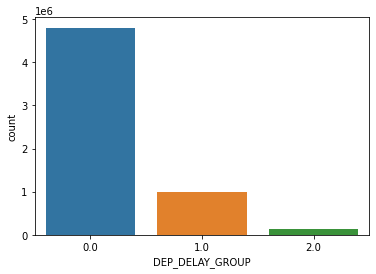

In [9]:
sns.countplot(df_train['DEP_DELAY_GROUP'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


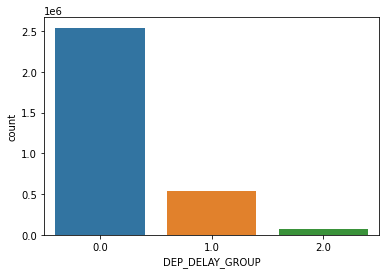

In [10]:
sns.countplot(df_test['DEP_DELAY_GROUP'],label="Count")

In [49]:
encode_columns = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST']
df_test_encoded = pd.get_dummies(df_test, columns=encode_columns).sample(150000)
df_train_encoded = pd.get_dummies(df_train, columns=encode_columns).sample(50000)
del df_test, df_train

In [37]:
df_test_encoded

,YEAR,MONTH,DAY_OF_MONTH,CRS_DEP_TIME,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_VX,OP_UNIQUE_CARRIER_WN,ORIGIN_ATL,ORIGIN_AUS,ORIGIN_BNA,ORIGIN_BOS,ORIGIN_BWI,ORIGIN_CLT,ORIGIN_DAL,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DTW,ORIGIN_EWR,ORIGIN_FLL,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_IAH,ORIGIN_JFK,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LGA,...,DEST_ATL,DEST_AUS,DEST_BNA,DEST_BOS,DEST_BWI,DEST_CLT,DEST_DAL,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_EWR,DEST_FLL,DEST_HNL,DEST_HOU,DEST_IAH,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCI,DEST_MCO,DEST_MDW,DEST_MIA,DEST_MSP,DEST_MSY,DEST_OAK,DEST_ORD,DEST_PDX,DEST_PHL,DEST_PHX,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SJC,DEST_SLC,DEST_SMF,DEST_SNA,DEST_STL,DEST_TPA
1511161,2018,11,7,645,0.0,802,77.0,280.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1221730,2018,9,11,759,0.0,1052,173.0,1069.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2732755,2018,12,4,1122,0.0,1155,93.0,368.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1541985,2018,11,4,605,0.0,820,255.0,1491.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1324296,2018,2,19,550,0.0,915,145.0,967.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733085,2018,5,26,1655,0.0,2015,200.0,1096.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
763255,2018,4,16,1143,1.0,1623,220.0,1562.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1715419,2018,6,21,825,0.0,909,104.0,507.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1432006,2018,2,7,1135,0.0,1300,85.0,405.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
type(df_train_encoded['OP_UNIQUE_CARRIER_AS'][1])

numpy.uint8

In [12]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

In [50]:
# Training Data
train_x = df_train_encoded.drop(axis=1, columns=['DEP_DELAY_GROUP'])
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = df_test_encoded.drop(axis=1, columns=['DEP_DELAY_GROUP'])
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (50000, 99)
Testing Data : (150000, 99)


In [51]:
# Training Data
train_y = df_train_encoded[['DEP_DELAY_GROUP']]
print("Training Data :", train_y.shape)

# Testing Data
test_y = df_test_encoded[['DEP_DELAY_GROUP']]
print("Testing Data :", test_y.shape)

Training Data : (50000, 1)
Testing Data : (150000, 1)


In [40]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [53]:
X = tf.compat.v1.placeholder(tf.float32, [None,99])
Y = tf.compat.v1.placeholder(tf.float32, [None, 1])

In [54]:
#weight
W = tf.Variable(tf.random_normal([99,1], seed=0), name='weight')

# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

In [55]:
logits = tf.matmul(X,W) + b

In [56]:
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

In [57]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [58]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 0.000	Acc: 17.05%


KeyboardInterrupt: ignored

In [26]:
2def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf.placeholder(tf.float32, [None,99])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([99,198], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([198], seed=0), name='bias1')
    layer1 = tf.nn.softmax(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([198,198], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([198], seed=0), name='bias2')
    layer2 = tf.nn.softmax(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([198,297], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([297], seed=0), name='bias3')
    layer3 = tf.nn.softmax(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([297,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.softmax(logits)

    cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc

In [27]:
ann_mlp_train_acc, ann_mlp_test_acc = ann_mlp()

===========Data Summary===========
Training Data : (120000, 99)
Testing Data : (120000, 99)

============Processing============
Step:     0	Loss: 0.000	Acc: 17.58%
Step:  1000	Loss: 0.000	Acc: 17.58%
Step:  2000	Loss: 0.000	Acc: 17.58%
Step:  3000	Loss: 0.000	Acc: 17.58%
Step:  4000	Loss: 0.000	Acc: 17.58%
Step:  5000	Loss: 0.000	Acc: 17.58%
Step:  6000	Loss: 0.000	Acc: 17.58%
Step:  7000	Loss: 0.000	Acc: 17.58%
Step:  8000	Loss: 0.000	Acc: 17.58%
Step:  9000	Loss: 0.000	Acc: 17.58%
Step: 10000	Loss: 0.000	Acc: 17.58%

============Results============
Model Prediction = 0.17576666
Test Prediction = 0.199025


In [28]:
def ann_mlp_pca():
    sklearn_pca = sklearnPCA(n_components=10)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,10])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([10,64], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([64], seed=0), name='bias1')
    layer1 = tf.nn.softmax(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([64,128], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([128], seed=0), name='bias2')
    layer2 = tf.nn.softmax(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([128,128], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([128], seed=0), name='bias3')
    layer3 = tf.nn.softmax(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([128,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.softmax(logits)

    cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc,test_acc
        


In [29]:
ann_mlp_pca_train_acc, ann_mlp_pca_test_acc = ann_mlp_pca()

===========Data Summary===========
PCA Training Data : (120000, 10)
PCA Testing Data : (120000, 10)

============Processing============
Step:     0	Loss: 0.000	Acc: 17.58%
Step:  1000	Loss: 0.000	Acc: 17.58%
Step:  2000	Loss: 0.000	Acc: 17.58%
Step:  3000	Loss: 0.000	Acc: 17.58%
Step:  4000	Loss: 0.000	Acc: 17.58%
Step:  5000	Loss: 0.000	Acc: 17.58%
Step:  6000	Loss: 0.000	Acc: 17.58%
Step:  7000	Loss: 0.000	Acc: 17.58%
Step:  8000	Loss: 0.000	Acc: 17.58%
Step:  9000	Loss: 0.000	Acc: 17.58%
Step: 10000	Loss: 0.000	Acc: 17.58%

============Results============
PCA Model Prediction = 0.17576666
PCA Test Prediction = 0.199025
